# Cubic Element for Poisson Equation in 2D

This example is to show the rate of convergence of the cubic finite element approximation of the Poisson equation on the unit square:

$$- \Delta u = f \; \hbox{in } (0,1)^2$$

for the following boundary conditions
- Non-empty Dirichlet boundary condition: $u=g_D \hbox{ on }\Gamma_D, \nabla u\cdot n=g_N \hbox{ on }\Gamma_N.$
- Pure Neumann boundary condition: $\nabla u\cdot n=g_N \hbox{ on } \partial \Omega$.
- Robin boundary condition: $g_R u + \nabla u\cdot n=g_N \hbox{ on }\partial \Omega$.

**References**:
- [Quick Introduction to Finite Element Methods](femdoc.html)
- [Introduction to Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch2FEM.pdf)
- [Progamming of Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch3FEMCode.pdf)

## P3 Cubic Element

We explain degree of freedoms and Lagrange basis for the cubic element on a triangle. There are three types of dofs: vertex type, edge type and element type. Given a mesh, the required data structure can be constructured by

      [elem2dof,elem2edge,edge,bdDof,freeDof] = dofP3(elem)

**A local basis of P3**

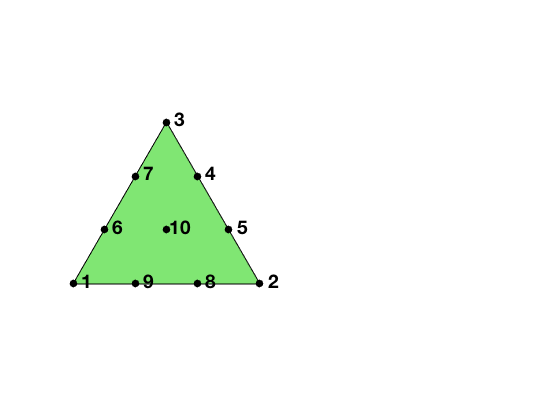

In [5]:
node = [0 0; 1 0; 0.5 0.5*sqrt(3)];
elem = [1 2 3];
lambda = [1 0 0; 0 1 0; 0 0 1; ...  % 1,2,3 three vertices
          0 1/3 2/3; 0 2/3 1/3; ... % 4, 5 first edge
          2/3 0 1/3; 1/3 0 2/3; ... % 6, 7 second edge 
          1/3 2/3 0; 2/3 1/3 0; ... % 8, 9 third edge
          1/3 1/3 1/3];             % 10   center of element
dofNode = lambda*node;
figure; subplot(1,2,1);
showmesh(node,elem);
hold on;
findnode(dofNode);

The 10 Lagrange-type basis functions are denoted by $\phi_i, i=1:10$, i.e
$\phi_i(x_j)=\delta _{ij},i,j=1:10$. In barycentric coordinates, they are

$$ \phi_1 = 1/2(3\lambda_1-1) (3\lambda_1-2)\lambda_1,\quad \nabla \phi_1 = (27/2 \lambda_1 \lambda_1-9 \lambda_1+1) \nabla \lambda_1,$$

$$ \phi_2 = 1/2(3\lambda_2-1) (3\lambda_2-2)\lambda_2,\quad  \nabla \phi_2 = (27/2 \lambda_2 \lambda_2-9 \lambda_2+1) \nabla \lambda_2,$$ 

$$ \phi_3 = 1/2(3\lambda_3-1) (3\lambda_3-2)\lambda_3,\quad  \nabla \phi_3 = (27/2 \lambda_3 \lambda_3-9 \lambda_3+1) \nabla \lambda_3,$$ 

$$ \phi_4 = 9/2\lambda_3\lambda_2 (3\lambda_2-1),\quad  \nabla\phi_4 = 9/2 ((3 \lambda_2 \lambda_2-\lambda_2) \nabla \lambda_3+ \lambda_3 (6 \lambda_2-1) \nabla \lambda_2)$$ 

$$ \phi_5 = 9/2\lambda_3\lambda_2 (3\lambda_3-1),\quad  \nabla\phi_5 = 9/2 ((3 \lambda_3 \lambda_3-\lambda_3) \nabla \lambda_2+ \lambda_2 (6 \lambda_3-1) \nabla \lambda_3),$$ 

$$ \phi_6 = 9/2\lambda_1\lambda_3 (3\lambda_3-1),\quad  \nabla\phi_6 = 9/2 ((3 \lambda_3 \lambda_3-\lambda_3) \nabla \lambda_1+ \lambda_1 (6 \lambda_3-1) \nabla \lambda_3),$$

$$ \phi_7 = 9/2\lambda_1\lambda_3 (3\lambda_1-1),\quad  \nabla\phi_7 = 9/2 ((3 \lambda_1 \lambda_1-\lambda_1) \nabla \lambda_3+ \lambda_3 (6 \lambda_1-1) \nabla \lambda_1),$$ 

$$ \phi_8 = 9/2\lambda_1\lambda_2 (3\lambda_1-1),\quad  \nabla\phi_8 = 9/2 ((3 \lambda_1 \lambda_1-\lambda_1) \nabla \lambda_2+ \lambda_2 (6 \lambda_1-1) \nabla \lambda_1),$$ 

$$ \phi_9 = 9/2\lambda_1\lambda_2 (3\lambda_2-1),\quad  \nabla\phi_9 = 9/2 ((3 \lambda_2 \lambda_2-\lambda_2) \nabla \lambda_1+ \lambda_1 (6 \lambda_2-1) \nabla \lambda_2),$$ 

$$ \phi_{10} = 27\lambda_1\lambda_2\lambda_3, \quad \nabla \phi_{10} =  27 (\lambda_1 \lambda_2 \nabla \lambda_3+\lambda_1 \lambda_3 \nabla \lambda_2+ \lambda_3 \lambda_2 \nabla \lambda_1).$$

When transfer to the reference triangle formed by $(0,0),(1,0),(0,1)$,
the local bases in x-y coordinate can be obtained by substituting 

$$\lambda _1 = x, \quad \lambda _2 = y, \quad \lambda _3 = 1-x-y.$$ 

## Local to global index mapp

The matrix `elem2dof` is the local to global index mapping of dofs which can be generated by `dofP3(elem)`.  The global indices of the dof is organized according to the order of nodes, edges and elements. To be consistent, the dof on an edge depends on the orientation of edge only. 

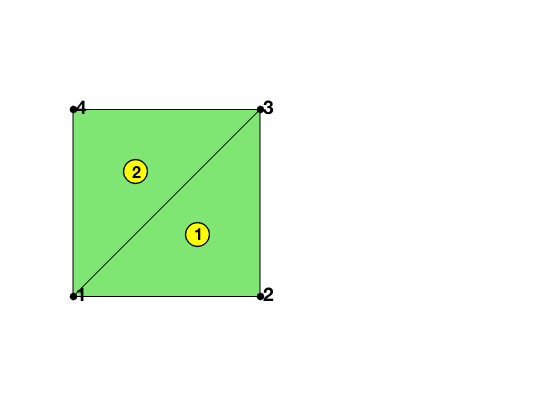

In [11]:
node = [0,0; 1,0; 1,1; 0,1];
elem = [2,3,1; 4,1,3];      
figure; subplot(1,2,1);
showmesh(node,elem);
findnode(node);
findelem(node,elem,'all','index','FaceColor',[0.5 0.9 0.45]);
[elem2dof,elem2edge,edge,bdDof,freeDof] = dofP3(elem);

In [7]:
display(elem2dof);
display(bdDof);


elem2dof =

  2�10 uint32 matrix

    2    3    1    8    7    5    6   11   12   15
    4    1    3    7    8   13   14   10    9   16


bdDof =

     1
     2
     3
     4
     5
     6
     9
    10
    11
    12
    13
    14



## Mixed boundary condition

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     2401,  #nnz:    35034, smoothing: (1,1), iter: 18,   err = 3.84e-10,   time = 0.18 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     9409,  #nnz:   145290, smoothing: (1,1), iter: 18,   err = 4.36e-10,   time = 0.19 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    37249,  #nnz:   591594, smoothing: (1,1), iter: 18,   err = 4.43e-10,   time = 0.44 s

 #Dof       h       ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  625   1.25e-01   2.70637e-05   1.12141e-03   9.84838e-04   5.67685e-05
 2401   6.25e-02   1.64347e-06   1.38348e-04   1.26253e-04   3.61495e-06
 9409   3.12e-02   1.01251e-07   1.71699e-05   1.59519e-05   2.26879e-07
37249   1.56e-02   6.28490e-09   2.13842e-06   2.00358e-06   1.42241e-08

 #Dof   Assemble     Solve      Error      Mesh    

  625   1.00e-01   3.60e-03   1.40e-01   1.00e-02
 2401   7.00e-02   1.78e-01   5.00e-02   1.00e-0

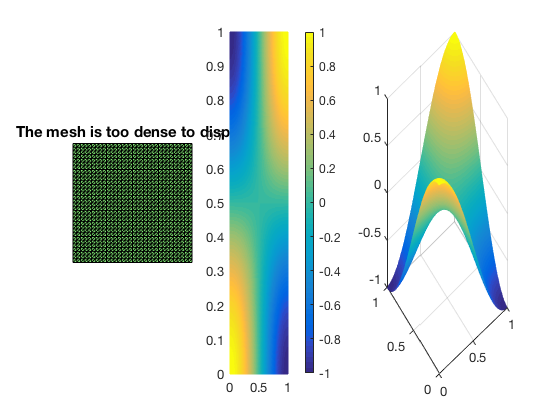

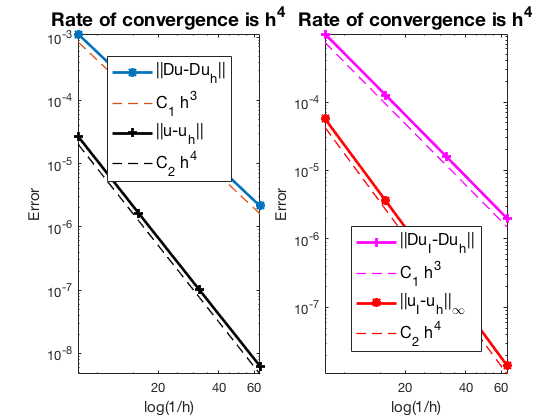

In [8]:
%% Setting
[node,elem] = squaremesh([0,1,0,1],0.25); 
mesh = struct('node',node,'elem',elem);
option.L0 = 1;
option.maxIt = 4;
option.printlevel = 1;
option.plotflag = 1;
option.elemType = 'P3';

%% Non-empty Dirichlet boundary condition.
pde = sincosdata;
mesh.bdFlag = setboundary(node,elem,'Dirichlet','~(x==0)','Neumann','x==0');
femPoisson(mesh,pde,option);

## Pure Neumann boundary condition

When pure Neumann boundary condition is posed, i.e., $-\Delta u =f$ in $\Omega$ and $\nabla u\cdot n=g_N$ on $\partial \Omega$, the data should be consisitent in the sense that $\int_{\Omega} f \, dx + \int_{\partial \Omega} g \, ds = 0$. The solution is unique up to a constant. A post-process is applied such that the constraint $\int_{\Omega}u_h dx = 0$ is imposed. 

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     2401,  #nnz:    38084, smoothing: (1,1), iter: 20,   err = 3.41e-10,   time = 0.073 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     9409,  #nnz:   151460, smoothing: (1,1), iter: 20,   err = 7.14e-10,   time = 0.14 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    37249,  #nnz:   604004, smoothing: (1,1), iter: 21,   err = 3.97e-10,   time = 0.32 s

 #Dof       h       ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  625   1.25e-01   4.29608e-04   1.70743e-02   1.61466e-02   8.39893e-04
 2401   6.25e-02   2.60671e-05   2.15721e-03   2.06194e-03   5.90094e-05
 9409   3.12e-02   1.60744e-06   2.71037e-04   2.58554e-04   3.79705e-06
37249   1.56e-02   9.99996e-08   3.39784e-05   3.22882e-05   2.39045e-07

 #Dof   Assemble     Solve      Error      Mesh    

  625   7.00e-02   2.35e-03   3.00e-02   0.00e+00
 2401   4.00e-02   7.27e-02   2.00e-02   0.00e+

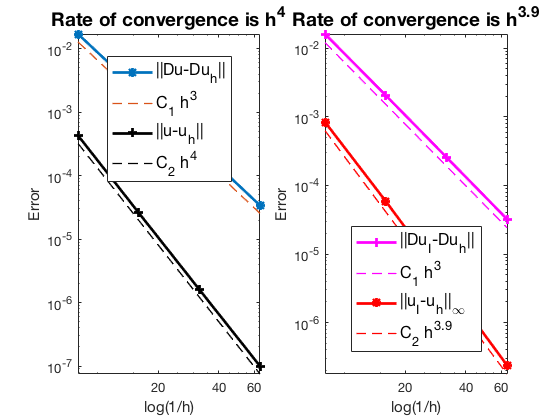

In [9]:
option.plotflag = 0;
pde = sincosNeumanndata;
mesh.bdFlag = setboundary(node,elem,'Neumann');
femPoisson(mesh,pde,option);

## Robin boundary condition

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     2401,  #nnz:    38113, smoothing: (1,1), iter: 17,   err = 7.78e-10,   time = 0.055 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     9409,  #nnz:   151489, smoothing: (1,1), iter: 17,   err = 8.91e-10,   time = 0.08 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    37249,  #nnz:   604033, smoothing: (1,1), iter: 17,   err = 9.77e-10,   time = 0.28 s

 #Dof       h       ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  625   1.25e-01   4.29700e-04   1.70747e-02   1.61526e-02   8.33177e-04
 2401   6.25e-02   2.60684e-05   2.15721e-03   2.06171e-03   5.87482e-05
 9409   3.12e-02   1.60746e-06   2.71037e-04   2.58543e-04   3.79065e-06
37249   1.56e-02   9.99999e-08   3.39784e-05   3.22878e-05   2.38940e-07

 #Dof   Assemble     Solve      Error      Mesh    

  625   9.00e-02   1.39e-03   1.00e-02   0.00e+00
 2401   4.00e-02   5.52e-02   1.00e-02   0.00e+

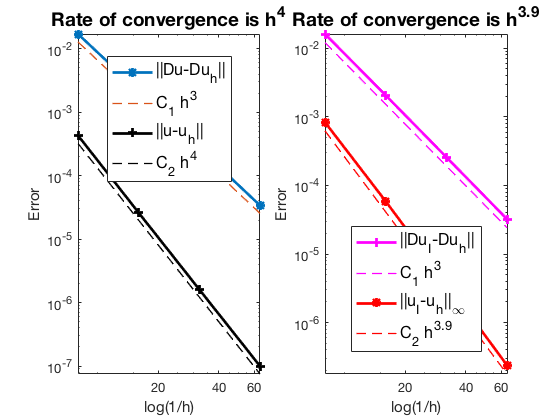

In [10]:
option.plotflag = 0;
pde = sincosRobindata;
mesh.bdFlag = setboundary(node,elem,'Robin');
femPoisson(mesh,pde,option);

## Conclusion

The optimal rate of convergence of the H1-norm (3rd order) and L2-norm (4th order) is observed. The order of $\|\nabla u_I - \nabla u_h\|$ is 3rd order and thus no superconvergence exists between nodal interpolate $u_I$ and $u_h$.

MGCG converges uniformly in all cases.